In [ ]:
import datetime
from datetime import datetime
import os

# Analise
import pandas as pd
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

#para salvar as figuras
import pickle

In [ ]:
docentes = pd.read_csv('/content/drive/MyDrive/Mestrado - Alana/Bootcamp/Projeto Final/dados/dados/micro/dados/MICRODADOS_ED_SUP_IES_2022.CSV',
                      sep=';',
                      encoding='iso-8859-1',
                      low_memory=False)


In [ ]:
docentes.head()

,NU_ANO_CENSO,NO_REGIAO_IES,CO_REGIAO_IES,NO_UF_IES,SG_UF_IES,CO_UF_IES,NO_MUNICIPIO_IES,CO_MUNICIPIO_IES,IN_CAPITAL_IES,NO_MESORREGIAO_IES,...,QT_DOC_EX_60_MAIS,QT_DOC_EX_BRANCA,QT_DOC_EX_PRETA,QT_DOC_EX_PARDA,QT_DOC_EX_AMARELA,QT_DOC_EX_INDIGENA,QT_DOC_EX_COR_ND,QT_DOC_EX_BRA,QT_DOC_EX_EST,QT_DOC_EX_COM_DEFICIENCIA
0,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,...,183,1023,85,431,43,8,47,1609,28,6
1,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,1,Distrito Federal,...,506,1848,94,474,59,9,402,2731,155,17
2,2022,Nordeste,2,Sergipe,SE,28,São Cristóvão,2806701,0,Leste Sergipano,...,196,206,31,266,13,2,1231,1719,30,1
3,2022,Norte,1,Amazonas,AM,13,Manaus,1302603,1,Centro Amazonense,...,200,110,12,141,6,2,1447,1718,0,1
4,2022,Nordeste,2,Piauí,PI,22,Teresina,2211001,1,Centro-Norte Piauiense,...,239,133,44,232,1,2,1070,1482,0,0


In [ ]:
doc_info = [
    'NO_REGIAO_IES', 'NO_UF_IES', 'SG_UF_IES', 'TP_ORGANIZACAO_ACADEMICA',
    'TP_CATEGORIA_ADMINISTRATIVA', 'NO_IES', 'SG_IES', 'QT_DOC_TOTAL',
    'QT_DOC_EXE', 'QT_DOC_EX_FEMI', 'QT_DOC_EX_MASC', 'QT_DOC_EX_SEM_GRAD',
    'QT_DOC_EX_GRAD', 'QT_DOC_EX_ESP', 'QT_DOC_EX_MEST', 'QT_DOC_EX_DOUT',
    'QT_DOC_EX_INT', 'QT_DOC_EX_INT_DE', 'QT_DOC_EX_INT_SEM_DE',
    'QT_DOC_EX_PARC', 'QT_DOC_EX_HOR', 'QT_DOC_EX_0_29', 'QT_DOC_EX_30_34',
    'QT_DOC_EX_35_39', 'QT_DOC_EX_40_44', 'QT_DOC_EX_45_49', 'QT_DOC_EX_50_54',
    'QT_DOC_EX_55_59', 'QT_DOC_EX_60_MAIS', 'QT_DOC_EX_BRANCA',
    'QT_DOC_EX_PRETA', 'QT_DOC_EX_PARDA', 'QT_DOC_EX_AMARELA',
    'QT_DOC_EX_INDIGENA', 'QT_DOC_EX_COR_ND', 'QT_DOC_EX_BRA',
    'QT_DOC_EX_EST', 'QT_DOC_EX_COM_DEFICIENCIA'
]

docentes_df = docentes[doc_info]

In [ ]:
#docentes_df.to_csv('docentes.csv', sep='|', index=False)

# Nova seção

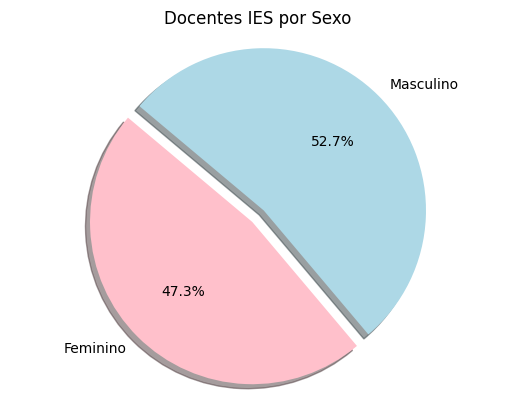

In [ ]:
sexo_feminino = docentes_df['QT_DOC_EX_FEMI']
sexo_masculino = docentes_df['QT_DOC_EX_MASC']

labels = ['Feminino', 'Masculino']
sizes = [sexo_feminino.sum(), sexo_masculino.sum()]
colors = ['pink', 'lightblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Docentes IES por Sexo')
plt.show()

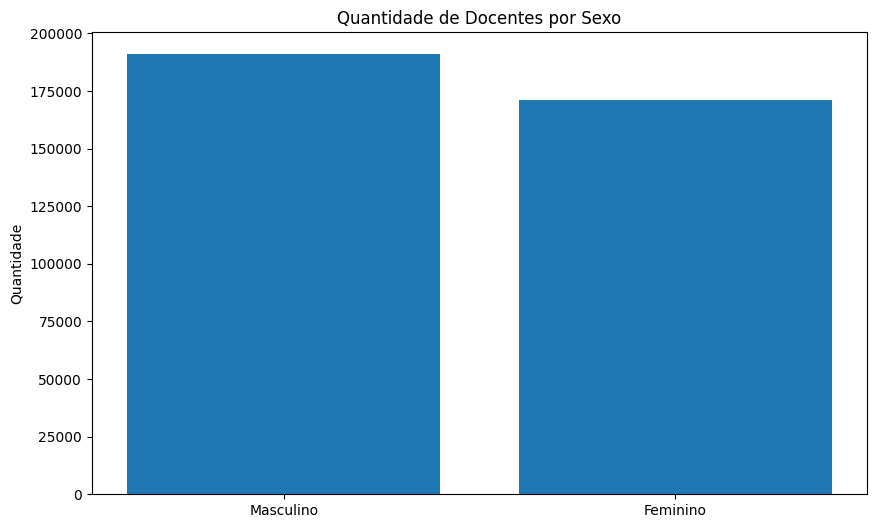

In [ ]:

plt.figure(figsize=(10, 6))

# colunas do gráfico
sexo_feminino = docentes_df['QT_DOC_EX_FEMI']
sexo_masculino = docentes_df['QT_DOC_EX_MASC']

plt.bar(['Masculino','Feminino'], [sexo_masculino.sum(), sexo_feminino.sum()])
plt.title('Quantidade de Docentes por Sexo')
plt.ylabel('Quantidade')

plt.show()


<ipython-input-9-62b3ac74e95b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docentes_df['Tipo_Organizacao'] = docentes_df['TP_ORGANIZACAO_ACADEMICA'].map(ies)


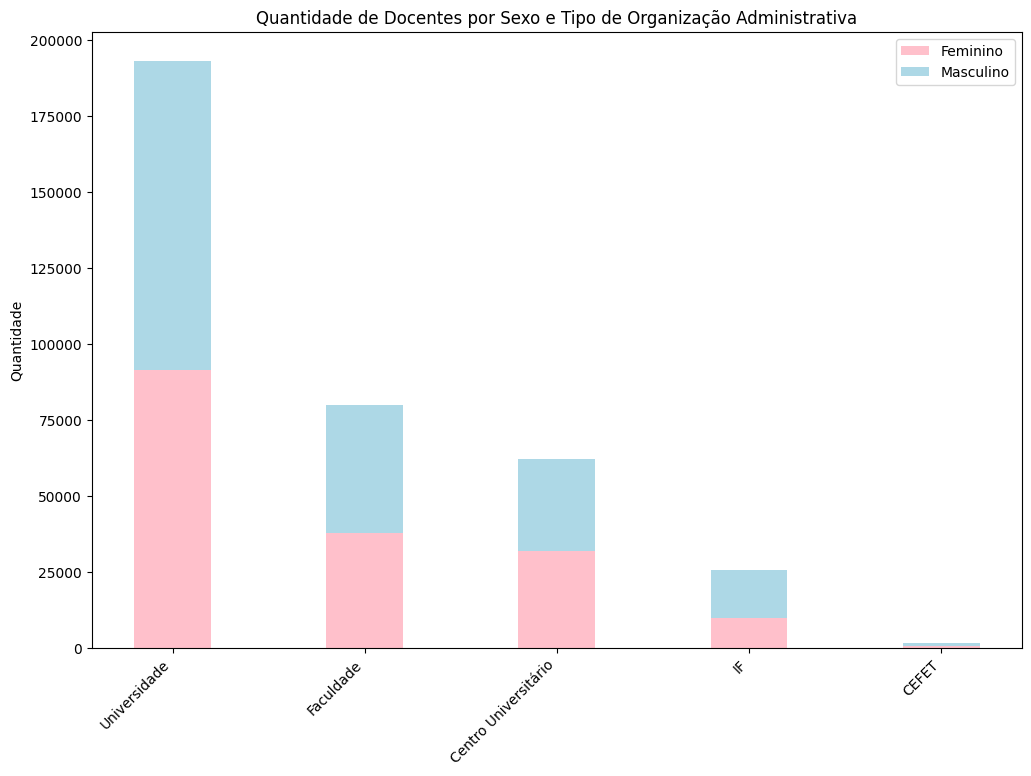

In [ ]:
ies = {
    1: 'Universidade',
    2: 'Centro Universitário',
    3: 'Faculdade',
    4: 'IF',
    5: 'CEFET'
}

docentes_df['Tipo_Organizacao'] = docentes_df['TP_ORGANIZACAO_ACADEMICA'].map(ies)
grupo_sexo_tipo = docentes_df.groupby('Tipo_Organizacao')[['QT_DOC_EX_FEMI', 'QT_DOC_EX_MASC']].sum()
grupo_sexo_tipo['Total'] = grupo_sexo_tipo['QT_DOC_EX_FEMI'] + grupo_sexo_tipo['QT_DOC_EX_MASC']
grupo_sexo_tipo = grupo_sexo_tipo.sort_values(by='Total', ascending=False)

# Gráfico barras
fig, ax = plt.subplots(figsize=(12, 8))

tipos = grupo_sexo_tipo.index

sexo_feminino = grupo_sexo_tipo['QT_DOC_EX_FEMI']
sexo_masculino = grupo_sexo_tipo['QT_DOC_EX_MASC']

bar1 = plt.bar(tipos, sexo_feminino, width=0.4, label='Feminino', color='pink')
bar2 = plt.bar(tipos, sexo_masculino, width=0.4, label='Masculino', color='lightblue', bottom=sexo_feminino)

plt.xticks(rotation=45, ha='right')  # Rotacione os rótulos do eixo x

plt.title('Quantidade de Docentes por Sexo e Tipo de Organização Administrativa')
plt.ylabel('Quantidade')
plt.legend()

plt.show()

<ipython-input-12-fbc69638efea>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docentes_df['Tipo_Organizacao'] = docentes_df['TP_ORGANIZACAO_ACADEMICA'].map(mapeamento)


NameError: ignored

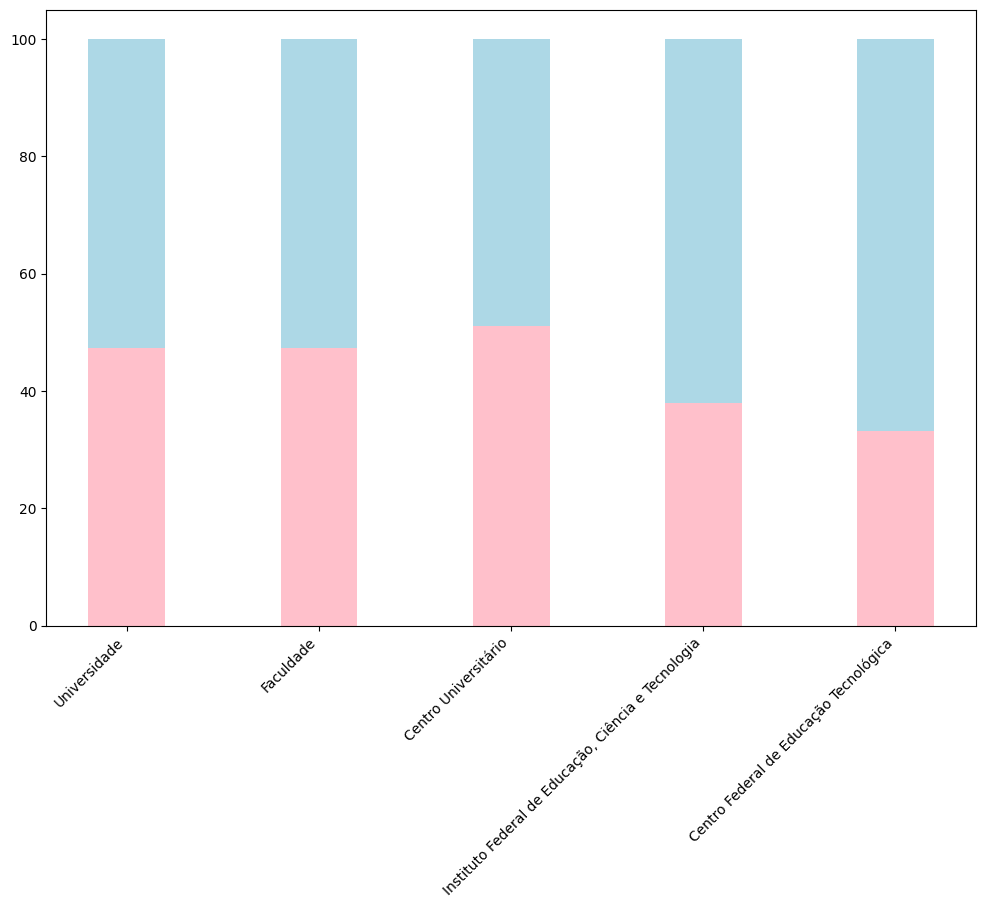

In [ ]:
mapeamento = {
    1: 'Universidade',
    2: 'Centro Universitário',
    3: 'Faculdade',
    4: 'Instituto Federal de Educação, Ciência e Tecnologia',
    5: 'Centro Federal de Educação Tecnológica'
}

docentes_df['Tipo_Organizacao'] = docentes_df['TP_ORGANIZACAO_ACADEMICA'].map(mapeamento)

# Agrupar os dados por Tipo_Organização
grupo_sexo_tipo = docentes_df.groupby('Tipo_Organizacao')[['QT_DOC_EX_FEMI', 'QT_DOC_EX_MASC']].sum()

# Calcular quantidade total de docentes
grupo_sexo_tipo['Total'] = grupo_sexo_tipo['QT_DOC_EX_FEMI'] + grupo_sexo_tipo['QT_DOC_EX_MASC']

# Calcular as porcentagens de docentes femininos e masculinos
grupo_sexo_tipo['Porcentagem_Feminino'] = (grupo_sexo_tipo['QT_DOC_EX_FEMI'] / grupo_sexo_tipo['Total']) * 100
grupo_sexo_tipo['Porcentagem_Masculino'] = (grupo_sexo_tipo['QT_DOC_EX_MASC'] / grupo_sexo_tipo['Total']) * 100

# Ordenar em ordem decrescente
grupo_sexo_tipo = grupo_sexo_tipo.sort_values(by='Total', ascending=False)

# Crie um gráfico de barras empilhadas para as porcentagens
fig, ax = plt.subplots(figsize=(12, 8))

# Obtenha os tipos de organização acadêmica na ordem decrescente
tipos = grupo_sexo_tipo.index

# Extraia as porcentagens das colunas
porcentagem_feminino = grupo_sexo_tipo['Porcentagem_Feminino']
porcentagem_masculino = grupo_sexo_tipo['Porcentagem_Masculino']

# Crie as barras empilhadas para as porcentagens
bar1 = plt.bar(tipos, porcentagem_feminino, width=0.4, label='% Feminino', color='pink')
bar2 = plt.bar(tipos, porcentagem_masculino, width=0.4, label='% Masculino', color='lightblue', bottom=porcentagem_feminino)

plt.xticks(rotation=45, ha='right')  # Rotacione os rótulos do eixo x

for bar in (bar1, bar2):
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1) if label == '% Feminino' else (0, -10),
                    textcoords='offset points', ha='center')

#xy=(rect.get_x() + rect.get_width() / 2, height).

plt.title('Porcentagem de Docentes por Sexo e Tipo de Organização Administrativa (Ordenado por Total)')
plt.ylabel('Porcentagem (%)')
plt.legend()

# Mostre o gráfico
plt.show()


Docente por Sexo apenas das IES públicas

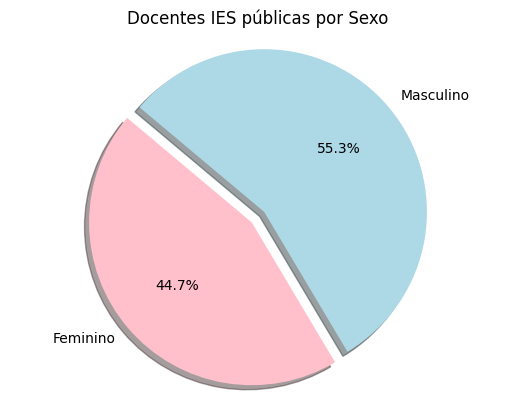

In [ ]:
# filtrar as IES públicas
categorias_interesse = [1, 2, 3]
docentes_interesse = docentes_df[docentes_df['TP_CATEGORIA_ADMINISTRATIVA'].isin(categorias_interesse)]


sexo_feminino = docentes_interesse['QT_DOC_EX_FEMI']
sexo_masculino = docentes_interesse['QT_DOC_EX_MASC']

labels = ['Feminino', 'Masculino']
sizes = [sexo_feminino.sum(), sexo_masculino.sum()]
colors = ['pink', 'lightblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Docentes IES públicas por Sexo')
plt.show()


Docente por sexo - particulares

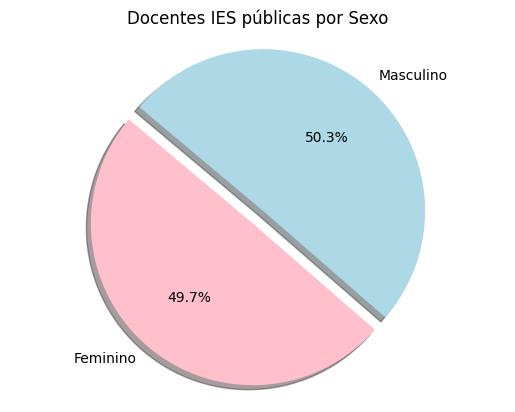

In [ ]:
# filtrar as IES privadas
categorias_interesse = [4, 5, 6]
docentes_interesse = docentes_df[docentes_df['TP_CATEGORIA_ADMINISTRATIVA'].isin(categorias_interesse)]


sexo_feminino = docentes_interesse['QT_DOC_EX_FEMI']
sexo_masculino = docentes_interesse['QT_DOC_EX_MASC']

labels = ['Feminino', 'Masculino']
sizes = [sexo_feminino.sum(), sexo_masculino.sum()]
colors = ['pink', 'lightblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Docentes IES públicas por Sexo')
plt.show()


Escolaridade dos docentes

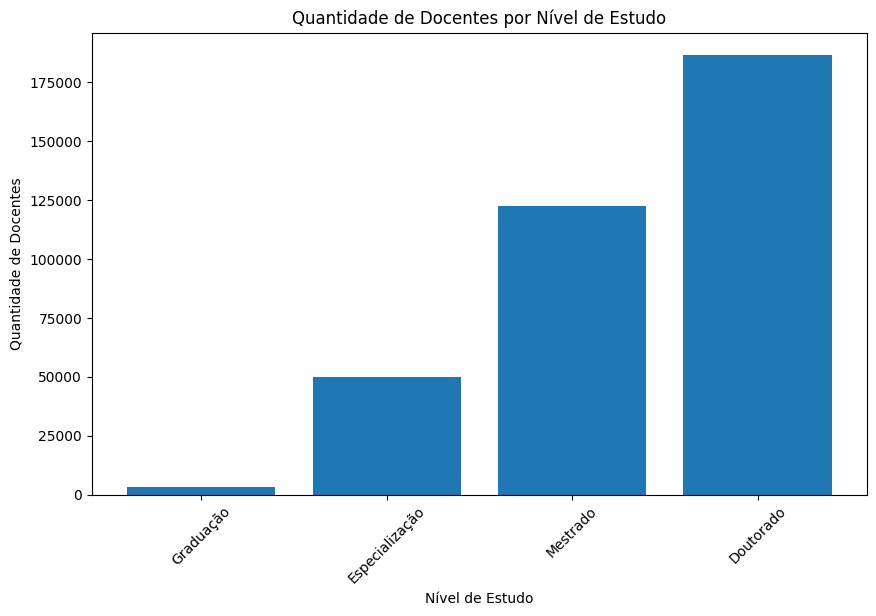

In [ ]:
estudo_columns = ['QT_DOC_EX_GRAD', 'QT_DOC_EX_ESP', 'QT_DOC_EX_MEST', 'QT_DOC_EX_DOUT']
estudo_labels = ['Graduação', 'Especialização', 'Mestrado', 'Doutorado']

# Calcular as somas para cada categoria de estudo
somas_estudo = docentes_df[estudo_columns].sum()

# gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(estudo_labels, somas_estudo)
plt.xlabel('Nível de Estudo')
plt.ylabel('Quantidade de Docentes')
plt.title('Quantidade de Docentes por Nível de Estudo')
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo x para facilitar a leitura

# Mostrar o gráfico
plt.show()


In [ ]:
#Nível de estudo IES públicas

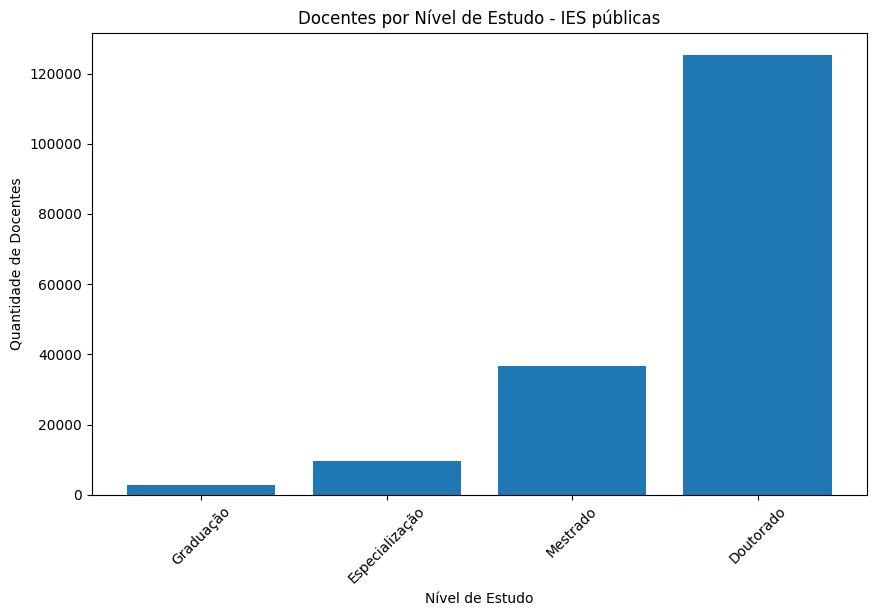

In [ ]:
categorias_interesse = [1, 2, 3]
docentes_interesse = docentes_df[docentes_df['TP_CATEGORIA_ADMINISTRATIVA'].isin(categorias_interesse)]

estudo_columns = ['QT_DOC_EX_GRAD', 'QT_DOC_EX_ESP', 'QT_DOC_EX_MEST', 'QT_DOC_EX_DOUT']
estudo_labels = ['Graduação', 'Especialização', 'Mestrado', 'Doutorado']

# Calcular as somas para cada categoria de estudo
somas_estudo = docentes_interesse[estudo_columns].sum()

# gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(estudo_labels, somas_estudo)
plt.xlabel('Nível de Estudo')
plt.ylabel('Quantidade de Docentes')
plt.title('Docentes por Nível de Estudo - IES públicas')
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo x para facilitar a leitura

# Mostrar o gráfico
plt.show()


Nível de estudo IES particulares

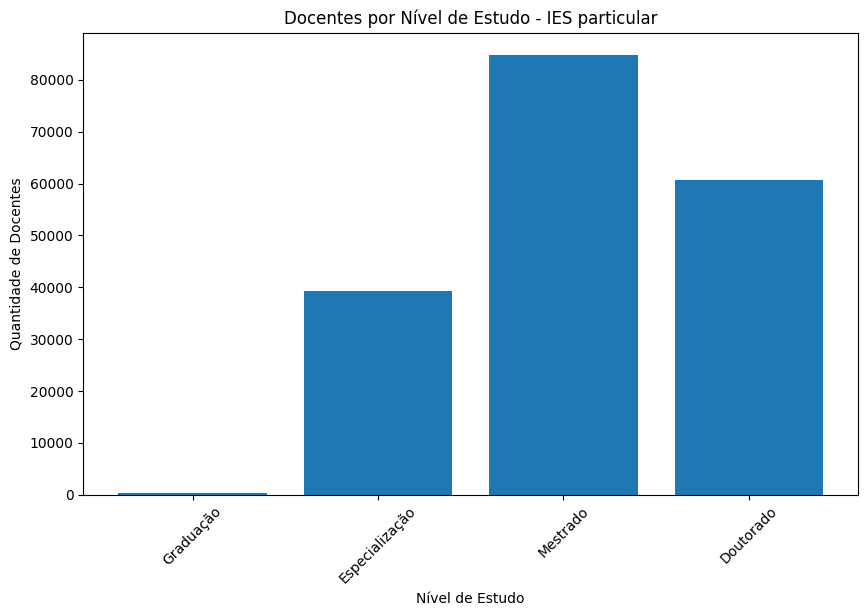

In [ ]:
categorias_interesse = [4, 5, 6]
docentes_interesse = docentes_df[docentes_df['TP_CATEGORIA_ADMINISTRATIVA'].isin(categorias_interesse)]


estudo_columns = ['QT_DOC_EX_GRAD', 'QT_DOC_EX_ESP', 'QT_DOC_EX_MEST', 'QT_DOC_EX_DOUT']
estudo_labels = ['Graduação', 'Especialização', 'Mestrado', 'Doutorado']

# Calcular as somas para cada categoria de estudo
somas_estudo = docentes_interesse[estudo_columns].sum()

# gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(estudo_labels, somas_estudo)
plt.xlabel('Nível de Estudo')
plt.ylabel('Quantidade de Docentes')
plt.title('Docentes por Nível de Estudo - IES particular')
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo x para facilitar a leitura

# Mostrar o gráfico
plt.show()


Idade docentes

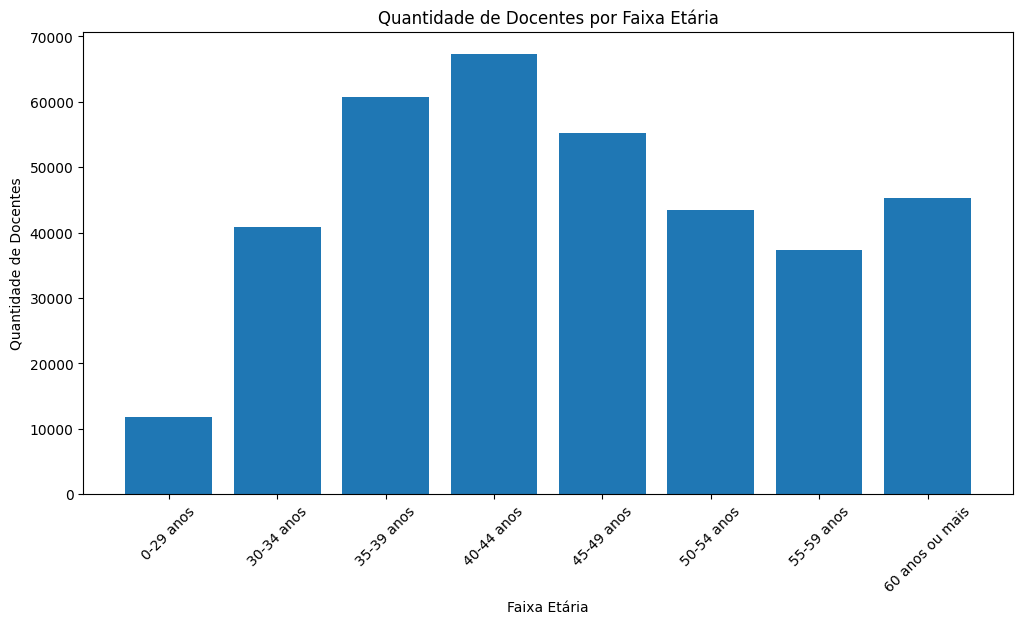

In [ ]:
idade_columns = ['QT_DOC_EX_0_29', 'QT_DOC_EX_30_34', 'QT_DOC_EX_35_39', 'QT_DOC_EX_40_44',
                 'QT_DOC_EX_45_49', 'QT_DOC_EX_50_54', 'QT_DOC_EX_55_59', 'QT_DOC_EX_60_MAIS']
idade_labels = ['0-29 anos', '30-34 anos', '35-39 anos', '40-44 anos', '45-49 anos',
                '50-54 anos', '55-59 anos', '60 anos ou mais']

# Calcular as somas para cada faixa etária
somas_idade = docentes_df[idade_columns].sum()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(idade_labels, somas_idade)
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Docentes')
plt.title('Quantidade de Docentes por Faixa Etária')
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo x para facilitar a leitura

plt.show()


Idade IES pública

In [ ]:
categorias_interesse = [1, 2, 3]
docentes_interesse = docentes_df[docentes_df['TP_CATEGORIA_ADMINISTRATIVA'].isin(categorias_interesse)]

idade_columns = ['QT_DOC_EX_0_29', 'QT_DOC_EX_30_34', 'QT_DOC_EX_35_39', 'QT_DOC_EX_40_44',
                 'QT_DOC_EX_45_49', 'QT_DOC_EX_50_54', 'QT_DOC_EX_55_59', 'QT_DOC_EX_60_MAIS']
idade_labels = ['0-29 anos', '30-34 anos', '35-39 anos', '40-44 anos', '45-49 anos',
                '50-54 anos', '55-59 anos', '60 anos ou mais']

somas_idade = docentes_interesse[idade_columns].sum()

# gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(idade_labels, somas_idade)
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Docentes')
plt.title('Quantidade de Docentes por Faixa Etária IES Públicas')
#plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo x para facilitar a leitura

plt.show()


NameError: ignored

Idade IES privada

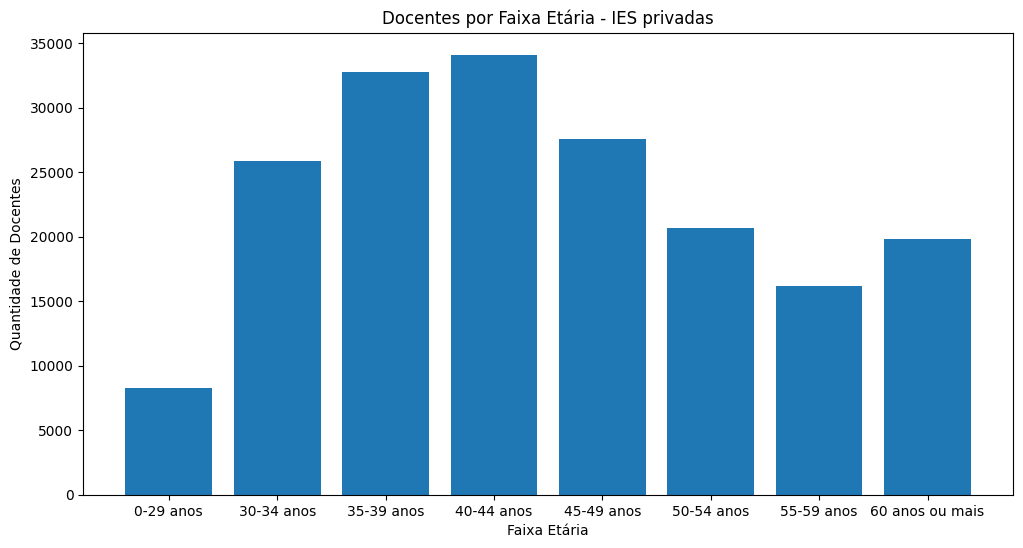

In [ ]:
categorias_interesse = [4, 5, 6]
docentes_interesse = docentes_df[docentes_df['TP_CATEGORIA_ADMINISTRATIVA'].isin(categorias_interesse)]

idade_columns = ['QT_DOC_EX_0_29', 'QT_DOC_EX_30_34', 'QT_DOC_EX_35_39', 'QT_DOC_EX_40_44',
                 'QT_DOC_EX_45_49', 'QT_DOC_EX_50_54', 'QT_DOC_EX_55_59', 'QT_DOC_EX_60_MAIS']
idade_labels = ['0-29 anos', '30-34 anos', '35-39 anos', '40-44 anos', '45-49 anos',
                '50-54 anos', '55-59 anos', '60 anos ou mais']

somas_idade = docentes_interesse[idade_columns].sum()

# gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(idade_labels, somas_idade)
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Docentes')
plt.title('Docentes por Faixa Etária - IES privadas')

plt.show()


Cor/raça docentes

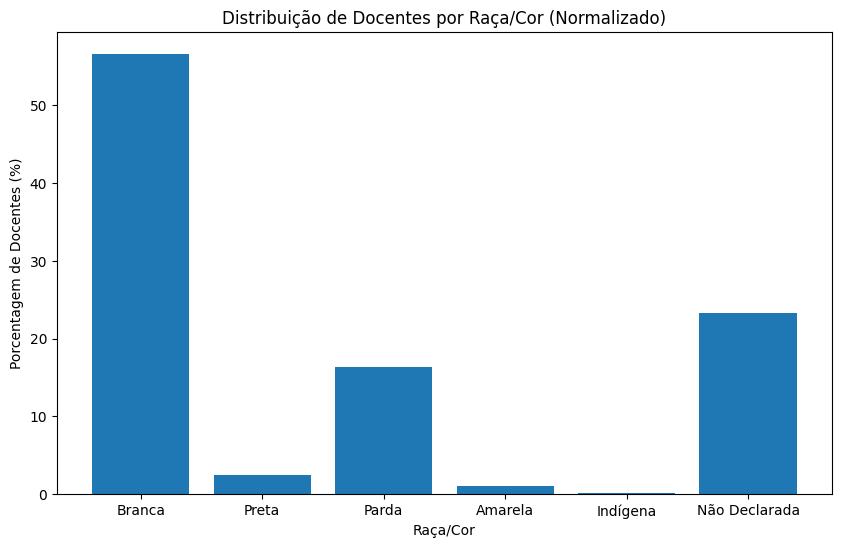

In [ ]:
raca_columns = ['QT_DOC_EX_BRANCA', 'QT_DOC_EX_PRETA', 'QT_DOC_EX_PARDA',
                'QT_DOC_EX_AMARELA', 'QT_DOC_EX_INDIGENA', 'QT_DOC_EX_COR_ND']
raca_labels = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não Declarada']

# Calcular as somas para cada categoria de raça
somas_raca = docentes_df[raca_columns].sum()

# Calcular o total de docentes
total_docentes = somas_raca.sum()

# Calcular as porcentagens
porcentagens_raca = (somas_raca / total_docentes) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(raca_labels, porcentagens_raca)
plt.xlabel('Raça/Cor')
plt.ylabel('Porcentagem de Docentes (%)')
plt.title('Distribuição de Docentes por Raça/Cor (Normalizado)')

plt.show()


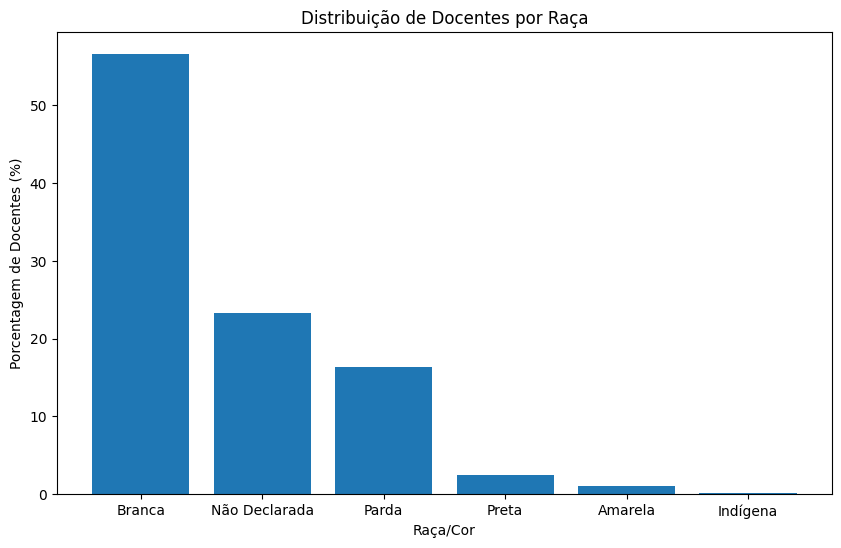

In [ ]:
#Docentes por Raça/Cor Normalizado e Ordem Decrescente
raca_columns = ['QT_DOC_EX_BRANCA', 'QT_DOC_EX_PRETA', 'QT_DOC_EX_PARDA',
                'QT_DOC_EX_AMARELA', 'QT_DOC_EX_INDIGENA', 'QT_DOC_EX_COR_ND']
raca_labels = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não Declarada']

# Calcular as somas para cada categoria de raça
somas_raca = docentes_df[raca_columns].sum()

# Calcular o total de docentes
total_docentes = somas_raca.sum()

# Calcular as porcentagens
porcentagens_raca = (somas_raca / total_docentes) * 100

# Organizar as raças em ordem decrescente de porcentagem
porcentagens_raca, raca_labels = zip(*sorted(zip(porcentagens_raca, raca_labels), reverse=True))

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(raca_labels, porcentagens_raca)
plt.xlabel('Raça/Cor')
plt.ylabel('Porcentagem de Docentes (%)')
plt.title('Distribuição de Docentes por Raça')

plt.show()


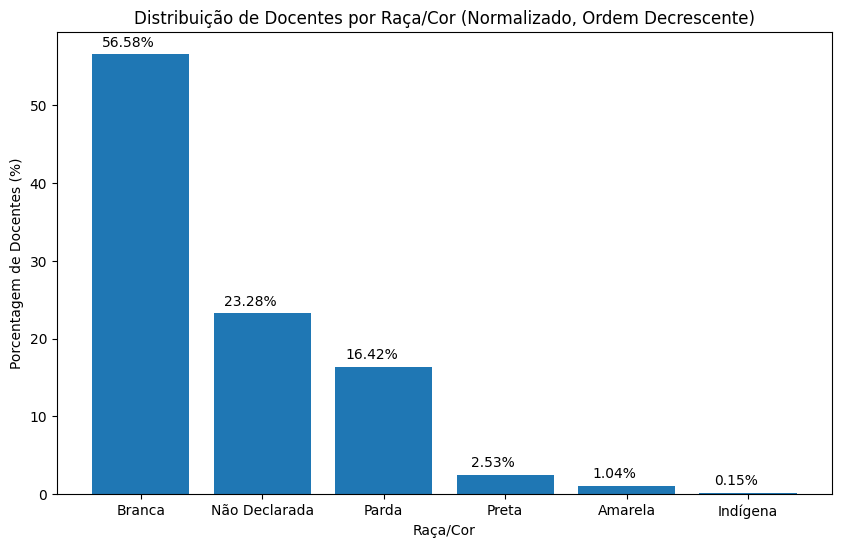

In [ ]:
raca_columns = ['QT_DOC_EX_BRANCA', 'QT_DOC_EX_PRETA', 'QT_DOC_EX_PARDA',
                'QT_DOC_EX_AMARELA', 'QT_DOC_EX_INDIGENA', 'QT_DOC_EX_COR_ND']
raca_labels = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não Declarada']

# Calcular as somas para cada categoria de raça
somas_raca = docentes_df[raca_columns].sum()

# Calcular o total de docentes
total_docentes = somas_raca.sum()

# Calcular as porcentagens
porcentagens_raca = (somas_raca / total_docentes) * 100

# Organizar as raças em ordem decrescente de porcentagem
porcentagens_raca, raca_labels = zip(*sorted(zip(porcentagens_raca, raca_labels), reverse=True))

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(raca_labels, porcentagens_raca)
plt.xlabel('Raça/Cor')
plt.ylabel('Porcentagem de Docentes (%)')
plt.title('Distribuição de Docentes por Raça/Cor (Normalizado, Ordem Decrescente)')

# Adicionar rótulos com as porcentagens
for bar, porcentagem in zip(bars, porcentagens_raca):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, f'{porcentagem:.2f}%', fontsize=10, ha='center')

plt.show()


Raça IES pública

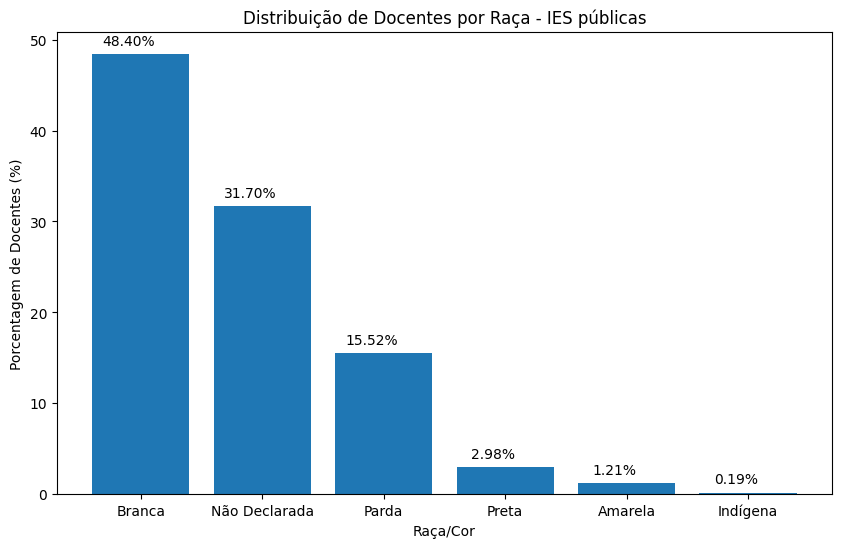

In [ ]:
categorias_interesse = [1, 2, 3]
docentes_interesse = docentes_df[docentes_df['TP_CATEGORIA_ADMINISTRATIVA'].isin(categorias_interesse)]

raca_columns = ['QT_DOC_EX_BRANCA', 'QT_DOC_EX_PRETA', 'QT_DOC_EX_PARDA',
                'QT_DOC_EX_AMARELA', 'QT_DOC_EX_INDIGENA', 'QT_DOC_EX_COR_ND']
raca_labels = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não Declarada']

somas_raca = docentes_interesse[raca_columns].sum()

# Calcular o total de docentes
total_docentes = somas_raca.sum()

# Calcular as porcentagens
porcentagens_raca = (somas_raca / total_docentes) * 100

# Organizar as raças em ordem decrescente de porcentagem
porcentagens_raca, raca_labels = zip(*sorted(zip(porcentagens_raca, raca_labels), reverse=True))

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(raca_labels, porcentagens_raca)
plt.xlabel('Raça/Cor')
plt.ylabel('Porcentagem de Docentes (%)')
plt.title('Distribuição de Docentes por Raça - IES públicas')

# Adicionar rótulos com as porcentagens
for bar, porcentagem in zip(bars, porcentagens_raca):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, f'{porcentagem:.2f}%', fontsize=10, ha='center')

plt.show()


Raça IES privada

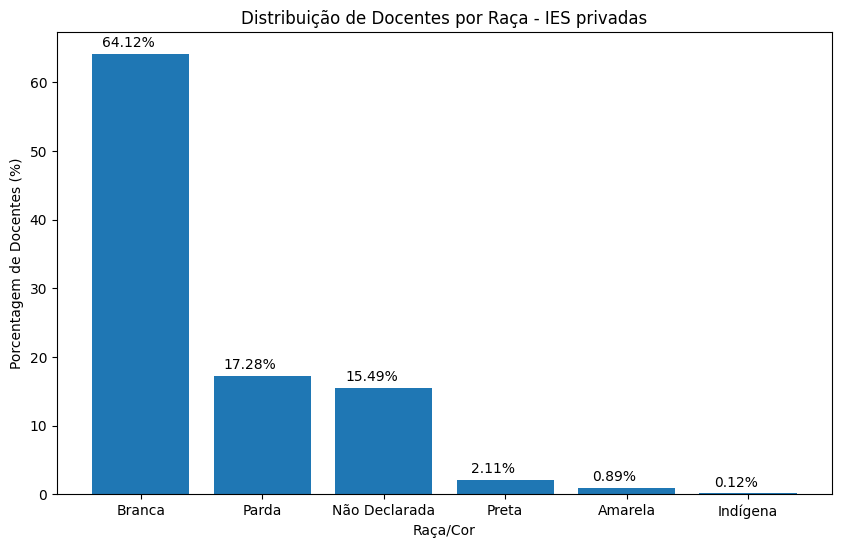

In [ ]:
categorias_interesse = [4, 5, 6]
docentes_interesse = docentes_df[docentes_df['TP_CATEGORIA_ADMINISTRATIVA'].isin(categorias_interesse)]

raca_columns = ['QT_DOC_EX_BRANCA', 'QT_DOC_EX_PRETA', 'QT_DOC_EX_PARDA',
                'QT_DOC_EX_AMARELA', 'QT_DOC_EX_INDIGENA', 'QT_DOC_EX_COR_ND']
raca_labels = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não Declarada']

somas_raca = docentes_interesse[raca_columns].sum()

# Calcular o total de docentes
total_docentes = somas_raca.sum()

# Calcular as porcentagens
porcentagens_raca = (somas_raca / total_docentes) * 100

# Organizar as raças em ordem decrescente de porcentagem
porcentagens_raca, raca_labels = zip(*sorted(zip(porcentagens_raca, raca_labels), reverse=True))

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(raca_labels, porcentagens_raca)
plt.xlabel('Raça/Cor')
plt.ylabel('Porcentagem de Docentes (%)')
plt.title('Distribuição de Docentes por Raça - IES privadas')

# Adicionar rótulos com as porcentagens
for bar, porcentagem in zip(bars, porcentagens_raca):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, f'{porcentagem:.2f}%', fontsize=10, ha='center')

plt.show()


In [ ]:
quantidade_deficientes = docentes_df['QT_DOC_EX_COM_DEFICIENCIA'].sum()
print(f"Quantidade de docentes com deficiência: {quantidade_deficientes}")


Quantidade de docentes com deficiência: 1609


<ipython-input-19-3323e3caf030>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docentes_df['QT_DOC_SEM_DEFICIENCIA'] = docentes_df['QT_DOC_EXE'] - docentes_df['QT_DOC_EX_COM_DEFICIENCIA']
<ipython-input-19-3323e3caf030>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docentes_df['Porcentagem_Com_Deficiencia'] = (docentes_df['QT_DOC_EX_COM_DEFICIENCIA'] / docentes_df['QT_DOC_EXE']) * 100
<ipython-input-19-3323e3caf030>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

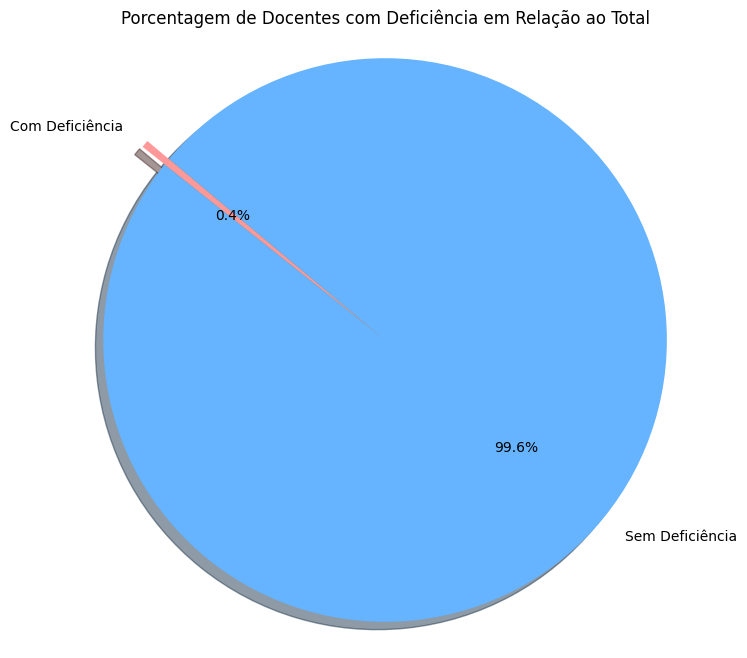

In [ ]:
# Calcular o número de docentes sem deficiência
docentes_df['QT_DOC_SEM_DEFICIENCIA'] = docentes_df['QT_DOC_EXE'] - docentes_df['QT_DOC_EX_COM_DEFICIENCIA']

# Calcular as porcentagens em relação ao número total de docentes
docentes_df['Porcentagem_Com_Deficiencia'] = (docentes_df['QT_DOC_EX_COM_DEFICIENCIA'] / docentes_df['QT_DOC_EXE']) * 100
docentes_df['Porcentagem_Sem_Deficiencia'] = (docentes_df['QT_DOC_SEM_DEFICIENCIA'] / docentes_df['QT_DOC_EXE']) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))

labels = 'Com Deficiência', 'Sem Deficiência'
sizes = [docentes_df['Porcentagem_Com_Deficiencia'].sum(), docentes_df['Porcentagem_Sem_Deficiencia'].sum()]
colors = ['#ff9999', '#66b3ff']  # Cores para "Com Deficiência" e "Sem Deficiência"
explode = (0.1, 0)  # Explodir a fatia "Com Deficiência"

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Garantir que o gráfico seja uma circunferência

plt.title('Porcentagem de Docentes com Deficiência em Relação ao Total')

plt.show()


Jornada de trabalho

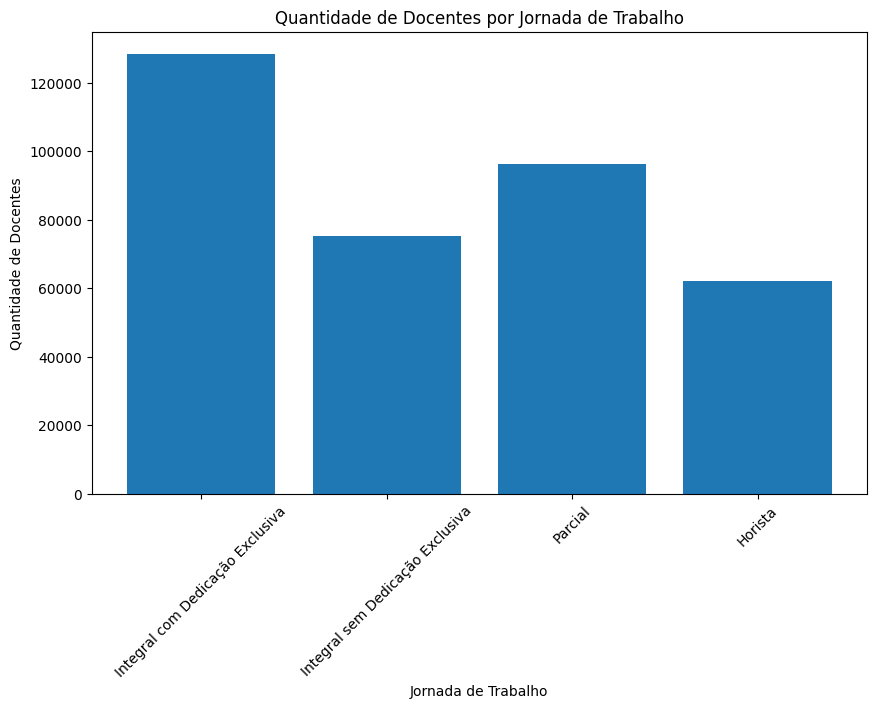

In [ ]:
jornada_columns = ['QT_DOC_EX_INT_DE', 'QT_DOC_EX_INT_SEM_DE', 'QT_DOC_EX_PARC', 'QT_DOC_EX_HOR']
jornada_labels = ['Integral com Dedicação Exclusiva', 'Integral sem Dedicação Exclusiva', 'Parcial', 'Horista']

# Calcular as somas para cada categoria de jornada
somas_jornada = docentes_df[jornada_columns].sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(jornada_labels, somas_jornada)
plt.xlabel('Jornada de Trabalho')
plt.ylabel('Quantidade de Docentes')
plt.title('Quantidade de Docentes por Jornada de Trabalho')
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo x para facilitar a leitura

plt.show()


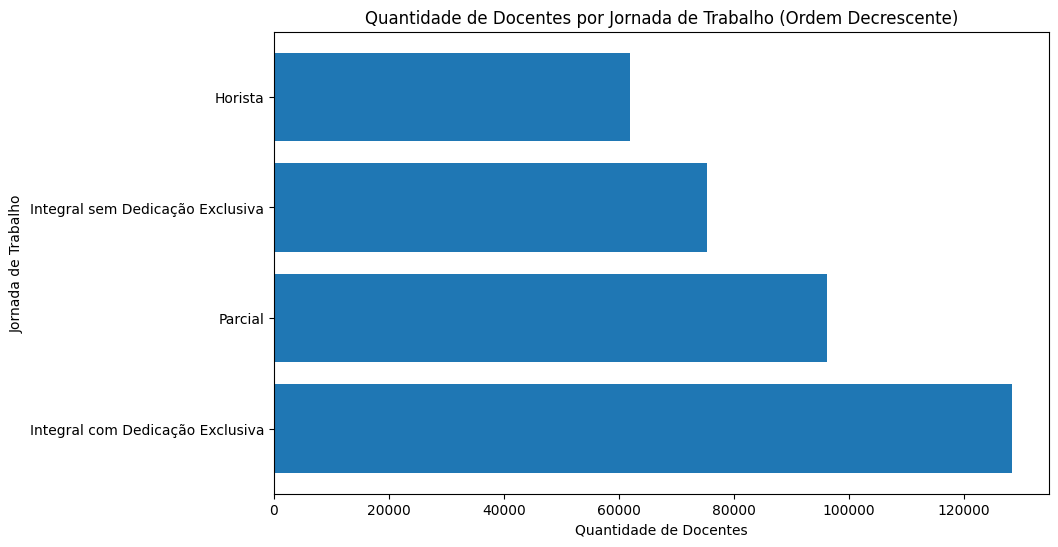

In [ ]:
jornada_columns = ['QT_DOC_EX_INT_DE', 'QT_DOC_EX_INT_SEM_DE', 'QT_DOC_EX_PARC', 'QT_DOC_EX_HOR']
jornada_labels = ['Integral com Dedicação Exclusiva', 'Integral sem Dedicação Exclusiva', 'Parcial', 'Horista']

# Calcular as somas para cada categoria de jornada
somas_jornada = docentes_df[jornada_columns].sum()

# Organizar as categorias em ordem decrescente
somas_jornada, jornada_labels = zip(*sorted(zip(somas_jornada, jornada_labels), reverse=True))

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(jornada_labels, somas_jornada)
plt.ylabel('Jornada de Trabalho')
plt.xlabel('Quantidade de Docentes')
plt.title('Quantidade de Docentes por Jornada de Trabalho (Ordem Decrescente)')

plt.show()


Jornada de trabalho IES pública

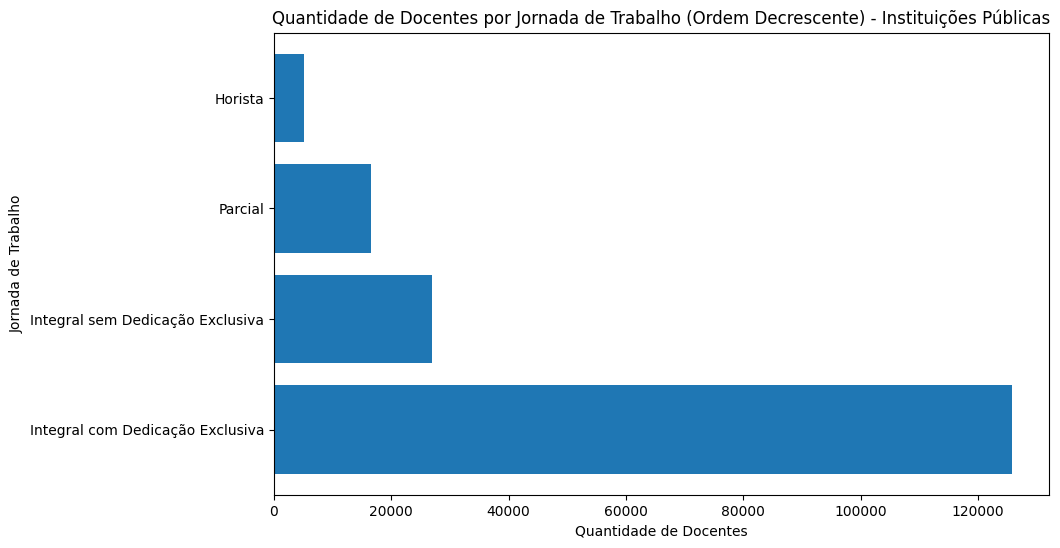

In [ ]:
categorias_interesse = [1, 2, 3]
docentes_interesse = docentes_df[docentes_df['TP_CATEGORIA_ADMINISTRATIVA'].isin(categorias_interesse)]

# Selecionar as colunas relevantes
jornada_columns = ['QT_DOC_EX_INT_DE', 'QT_DOC_EX_INT_SEM_DE', 'QT_DOC_EX_PARC', 'QT_DOC_EX_HOR']
jornada_labels = ['Integral com Dedicação Exclusiva', 'Integral sem Dedicação Exclusiva', 'Parcial', 'Horista']

# Calcular as somas para cada categoria de jornada
somas_jornada = docentes_interesse[jornada_columns].sum()

# Organizar as categorias em ordem decrescente
somas_jornada, jornada_labels = zip(*sorted(zip(somas_jornada, jornada_labels), reverse=True))

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(jornada_labels, somas_jornada)
plt.ylabel('Jornada de Trabalho')
plt.xlabel('Quantidade de Docentes')
plt.title('Quantidade de Docentes por Jornada de Trabalho (Ordem Decrescente) - Instituições Públicas')

plt.show()


jornada de trabalho IE privada

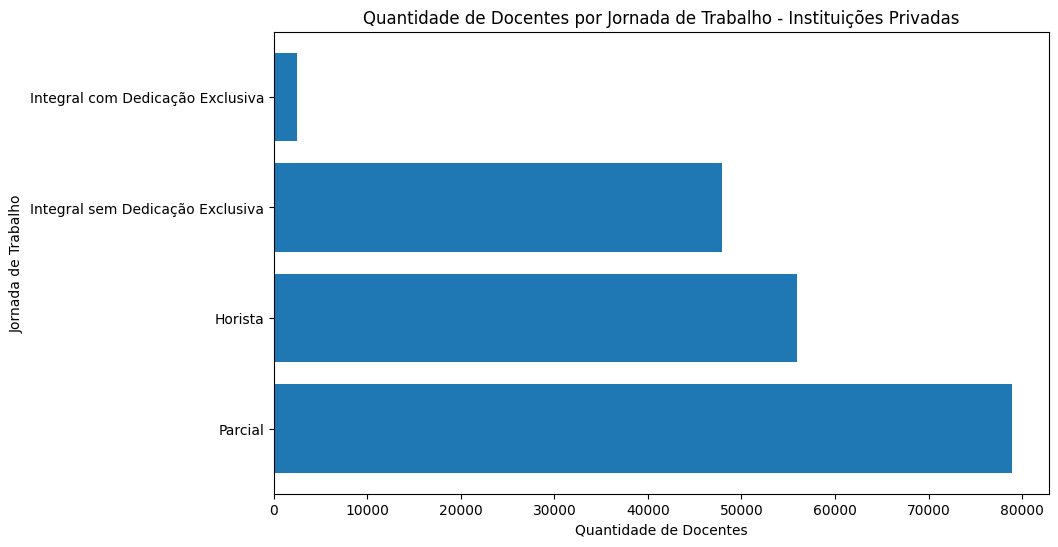

In [ ]:
categorias_interesse = [4,5,6]
docentes_interesse = docentes_df[docentes_df['TP_CATEGORIA_ADMINISTRATIVA'].isin(categorias_interesse)]

# Selecionar as colunas relevantes
jornada_columns = ['QT_DOC_EX_INT_DE', 'QT_DOC_EX_INT_SEM_DE', 'QT_DOC_EX_PARC', 'QT_DOC_EX_HOR']
jornada_labels = ['Integral com Dedicação Exclusiva', 'Integral sem Dedicação Exclusiva', 'Parcial', 'Horista']

# Calcular as somas para cada categoria de jornada
somas_jornada = docentes_interesse[jornada_columns].sum()

# Organizar as categorias em ordem decrescente
somas_jornada, jornada_labels = zip(*sorted(zip(somas_jornada, jornada_labels), reverse=True))

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(jornada_labels, somas_jornada)
plt.ylabel('Jornada de Trabalho')
plt.xlabel('Quantidade de Docentes')
plt.title('Quantidade de Docentes por Jornada de Trabalho - Instituições Privadas')

plt.show()
